# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Library Imports and Functions

In [3]:
import pandas as pd # data analysis and manipulation
import numpy as np # back up to pandas, I like to import it
import matplotlib.pyplot as plt # data visuals
import seaborn as sns # data visuals

In [4]:
# EDA functions

def df_shape(dataframe):
    shape = dataframe.shape
    if shape != (0, 0):
        return dataframe.shape
    else:
        return "Your dataframe does not exist. Check your dataframe variable."
    
def df_info(dataframe):
    info = dataframe.info()
    if not dataframe.empty:
        return info
    else:
        return "Your dataframe does not exist. Check your dataframe variable."
    
def df_head(dataframe):
    if not dataframe.empty:
        return dataframe.head()
    else:
        return "Your dataframe does not exist. Check your dataframe variable."


def df_nulls(dataframe):
    null_count = dataframe.isnull().sum()
    null_percent = (null_count * 100) / len(dataframe)
    if not dataframe.empty:
        print(f"Here are the number of nulls per column: \n{null_count}")
        print(f"Here are the percent of nulls per column: \n{null_percent}")
    else:
        return "Your dataframe does not exist. Check your dataframe variable."

def df_dups(dataframe):
    dup_count = dataframe.duplicated().sum()
    if not dataframe.empty:
        return f"There are {dup_count} duplicates in your dataframe."
    else:
        return "Your dataframe does not exist. Check your dataframe variable."
    
def drop_dups(dataframe):
    if not dataframe.empty:
        return dataframe.drop_duplicates()
    else:
        return "Your dataframe does not exist. Check your dataframe variable."

def df_num_describe(dataframe):
    if not dataframe.empty:
        return dataframe.describe()
    else:
        return "Your dataframe does not exist. Check your dataframe variable."

def df_cat_describe(dataframe):
    if not dataframe.empty():
        return dataframe.describe(include='O')
    else:
        return "Your dataframe does not exist. Check your dataframe variable."


# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [5]:
#load data

raw_data = pd.read_csv('Wholesale_Data.csv')

#make copy for manipulations
copy_data = raw_data.copy()

In [5]:
#get df shape
df_shape(copy_data)

# df of size (440, 8)

(440, 8)

In [6]:
#get info
df_info(copy_data)

# no nulls by the looks of it, will double check, all data types are int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
#get sample
df_head(copy_data)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [13]:
# check number of nulls and frequency
df_nulls(copy_data)

# no nulls at all

Here are the number of nulls per column: 
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
Here are the percent of nulls per column: 
Channel             0.0
Region              0.0
Fresh               0.0
Milk                0.0
Grocery             0.0
Frozen              0.0
Detergents_Paper    0.0
Delicassen          0.0
dtype: float64


In [14]:
#check for duplicates
df_dups(copy_data)

#no duplicates either

'There are 0 duplicates in your dataframe.'

In [15]:
df_num_describe(copy_data)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [16]:
#check unique values per column
copy_data.nunique()

# There are only two channels and 3 regions it appears.

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [19]:
# Channel and Region are numerical data representing categorical data so I am going to change them to categorical for exploration purposes

# 1 = Hotel/Restaurant/Cafe; 2 = Retail
channel_dict = {1: 'Hotel/Restaurant/Cafe', 2: 'Retail'}

# 1 = Lisnon; 2 = Oporto; 3 = Other
region_dict = {1: 'Lisnon', 2: 'Oproto', 3: 'Other'}

Text(0, 0.5, 'Count of Sales')

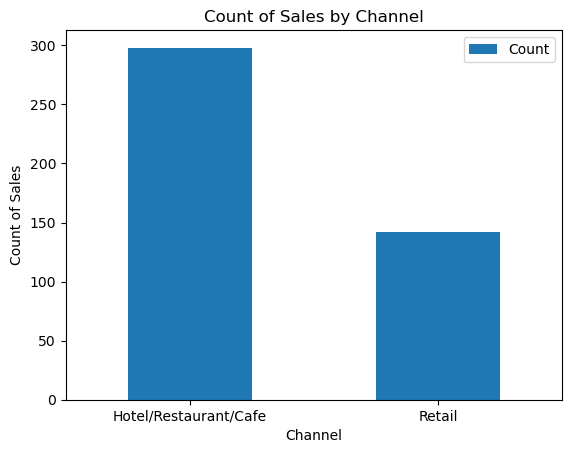

In [33]:
#count of channel

#change numerical labels to categorical for this purpose

channels = pd.DataFrame(copy_data['Channel'].value_counts())
channels = channels.reset_index().rename(columns={'index': 'Channel', 'Channel': 'Count'})
channels = channels.replace(channel_dict)

channel_graph = channels.plot.bar('Channel', 'Count', title='Count of Sales by Channel', rot=0)
channel_graph.set_ylabel('Count of Sales')




Observations: There are more transactions with hotels/restaurants/cafe than retail; almost double

Text(0, 0.5, 'Total Expenditure (Millions)')

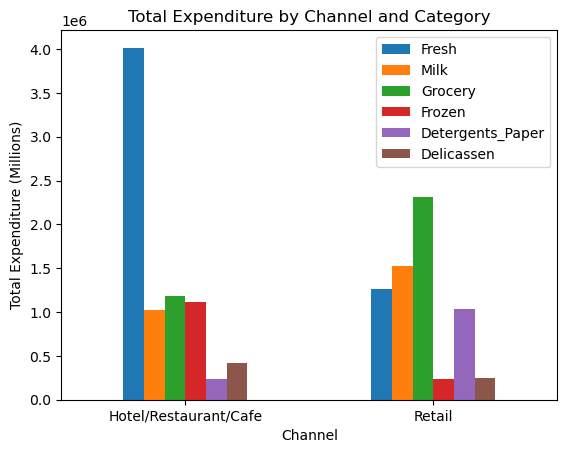

In [54]:
#drop region as irrelevent right now
channel_spend = copy_data.drop('Region', axis=1)

#total spent per channel
channel_spend = channel_spend.groupby('Channel').sum()

#replace channel to categorical
channel_spend = channel_spend.rename(index=channel_dict)

#scale the data down


#plot data
spend_graph = channel_spend.plot.bar(title='Total Expenditure by Channel and Category', rot=0)
spend_graph.set_ylabel('Total Expenditure (Millions)')

#Hotels/restaurants/cafes have an advantage in fresh, frozen, Delicassen

Observations: Hotels et al focus more on fresh by a minimum of 4X compared to the other categories.
Retail focuses more on grocery and milk.
There is a discrepancy fir detergents_paper which is strange - I would expect hotels et al., to have more spending here. 

Text(0, 0.5, 'Total Sales (Millions)')

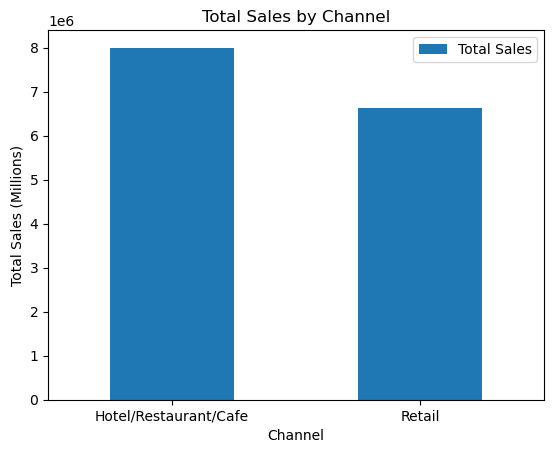

In [78]:
#total spent per channel
channel_total = pd.DataFrame(channel_spend.sum(axis=1))
channel_total = channel_total.rename(columns={0: 'Total Sales'})
total_graph = channel_total.plot.bar(title='Total Sales by Channel', rot=0)
total_graph.set_ylabel('Total Sales (Millions)')

Althought hotels et al., had almost 2X transactions, the difference in sales is about 1.5M

Text(0, 0.5, 'Count of Sales')

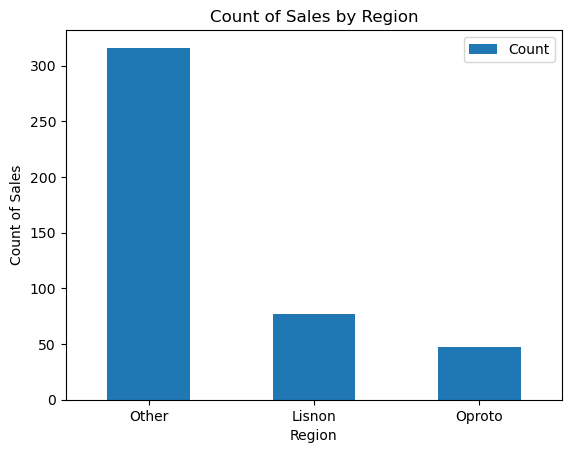

In [30]:
# count of region

regions = pd.DataFrame(copy_data['Region'].value_counts())
regions = regions.reset_index().rename(columns={'index': 'Region', 'Region': 'Count'})
regions = regions.replace(region_dict)

#make graph
regions_graph = regions.plot.bar('Region', 'Count', title='Count of Sales by Region', rot=0)
regions_graph.set_ylabel('Count of Sales')

Other regions were responsible for a lot of the transactions. It appears for a minimum of 3X compared to Lisnon and Oporto

Text(0, 0.5, 'Total Sales (Millions)')

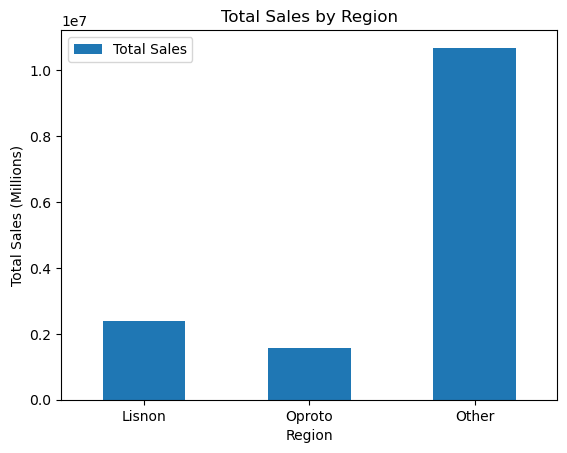

In [28]:
#look at sales by region total and category

#total sales by region

region_sales = copy_data.drop('Channel', axis=1)
region_total = pd.DataFrame(region_sales.groupby('Region').sum().sum(axis=1))
region_total = region_total.rename(columns={0: 'Total Sales'})

#replace numerical with categorial
region_total = region_total.rename(index=region_dict)

#graph regional total
total_graph = region_total.plot.bar(title='Total Sales by Region', rot=0)
total_graph.set_ylabel('Total Sales (Millions)')

The total sales matches the trend for number of transactions per region

Text(0, 0.5, 'Total Sales (Millions)')

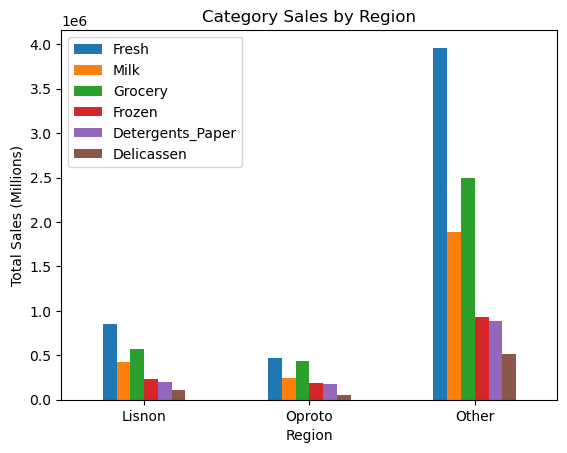

In [36]:
#make graph for region via category
region_cat = region_sales.groupby('Region').sum()
region_cat = region_cat.rename(index=region_dict)

#make graph
region_cat_graph = region_cat.plot.bar(title='Category Sales by Region', rot=0)
region_cat_graph.set_ylabel('Total Sales (Millions)')


The trend for category sales is consistent across all regions in the sense that Fresh is the highest and detergents_paper are the least.

In [51]:
#make graph by channel and by region
channel_region = copy_data.groupby(['Channel', 'Region']).sum()

#rename channel and region with categorical labels
channel_region = channel_region.rename(index=channel_dict, level=0)
channel_region = channel_region.rename(index=region_dict, level=1)

#need to make 3 graphs - channel 1, channel 2, and both

Fresh     Milk  Grocery  Frozen  \
Channel               Region                                      
Hotel/Restaurant/Cafe Lisnon   761233   228342   237542  184512   
                      Oproto   326215    64519   123074  160861   
                      Other   2928269   735753   820101  771606   
Retail                Lisnon    93600   194112   332495   46514   
                      Oproto   138506   174625   310200   29271   
                      Other   1032308  1153006  1675150  158886   

                              Detergents_Paper  Delicassen  
Channel               Region                                
Hotel/Restaurant/Cafe Lisnon             56081       70632  
                      Oproto             13516       30965  
                      Other             165990      320358  
Retail                Lisnon            148055       33695  
                      Oproto            159795       23541  
                      Other             724420      191752

Text(0, 0.5, 'Total Sales (Millions)')

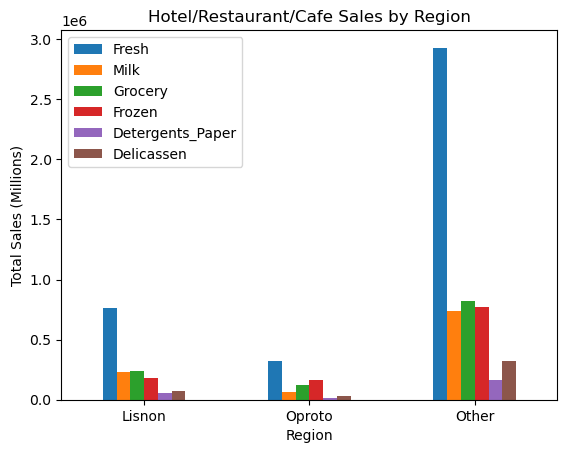

In [72]:
#channel 1 graph
channel_1 = channel_region.loc['Hotel/Restaurant/Cafe']
graph_1 = channel_1.plot.bar(title='Hotel/Restaurant/Cafe Sales by Region', rot=0)
graph_1.set_ylabel('Total Sales (Millions)')

Observations for Hotel et al.,
Fresh is most popular,
The "Others" account for a lot more in sales than Lisnon and Oporto,
Other follows the same trend as Lisnon, but Oporto has frozen over groceries and milk. Detergents and paper aren't very popular,

Text(0, 0.5, 'Total Sales (Millions)')

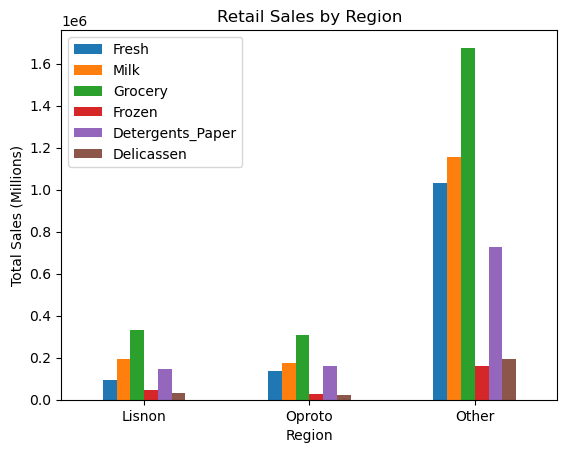

In [73]:
#channel 2 graph
channel_2 = channel_region.loc['Retail']
graph_2 = channel_2.plot.bar(title='Retail Sales by Region', rot=0)
graph_2.set_ylabel('Total Sales (Millions)')

Observations for Retail:
Same trend for all regions,
Grocery, Fresh, and milk are top 3
Lisnon and Oporto are similar in magnitude almost
Frozen is not popular

Hotels vs Retail comparison
highest impact is from Fresh vs Grocery respectively,
Retail spends more on detergents_paper
Hotels spend more on frozen

In [6]:
#determine data spread ID outliers

def make_hist(dataframe, columns, num_rows, num_columns, fig_size):
    if not dataframe.empty:
       fig, axs = plt.subplots(num_rows, num_columns, figsize=fig_size)
       for i in range(num_rows):
           for j in range(num_columns):
               axs[i,j].hist(dataframe[columns[i * num_columns + j]])
               axs[i,j].set_title(columns[i * num_columns + j])
    else:
        return "Your dataframe is empty. Check your dataframe variable"


def make_boxplot(dataframe, columns, num_rows, num_columns, fig_size):
    if not dataframe.empty:
       fig, axs = plt.subplots(num_rows, num_columns, figsize=fig_size)
       for i in range(num_rows):
           for j in range(num_columns):
               axs[i,j].boxplot(dataframe[columns[i * num_columns + j]])
               axs[i,j].set_title(columns[i * num_columns + j])
    else:
        return "Your dataframe is empty. Check your dataframe variable"


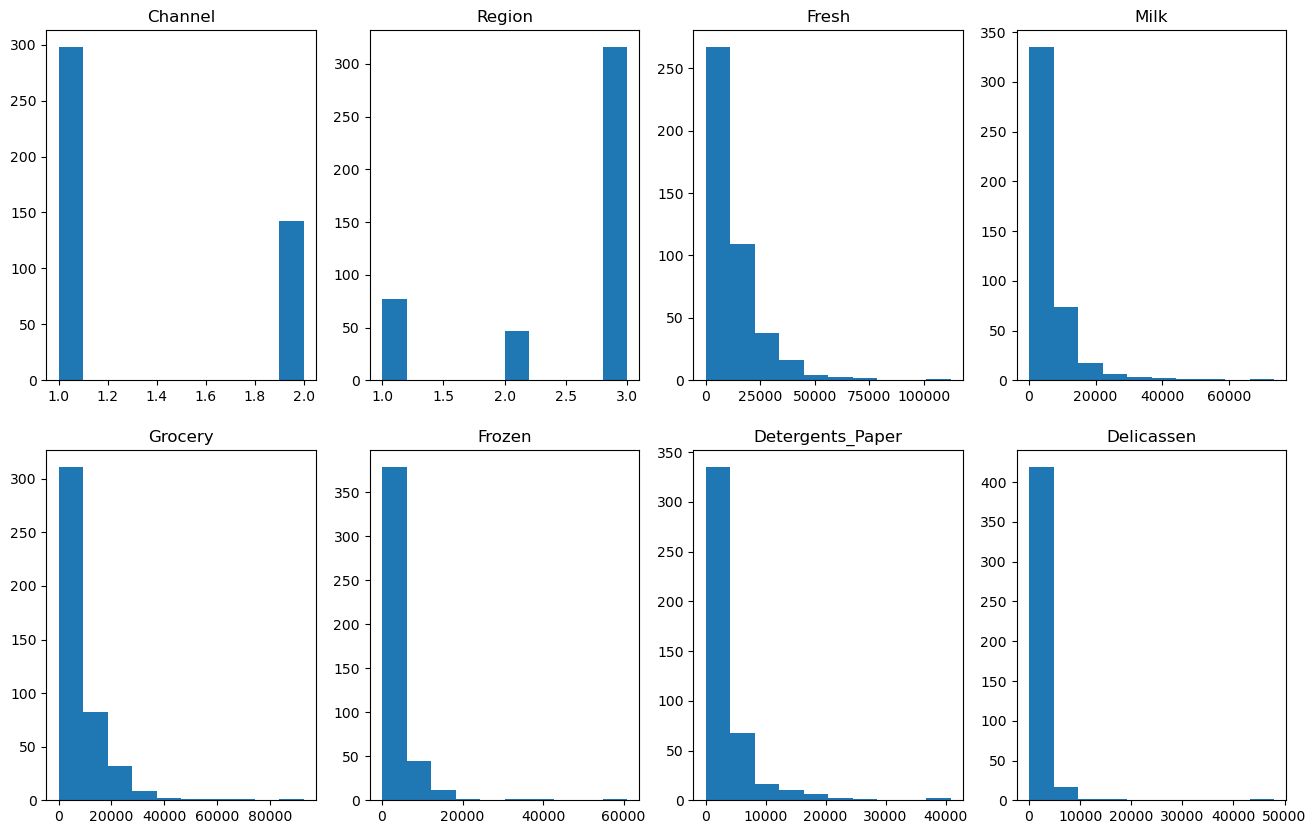

In [9]:
#make histogram for each feature
make_hist(copy_data, copy_data.columns, 2, 4, (16, 10))


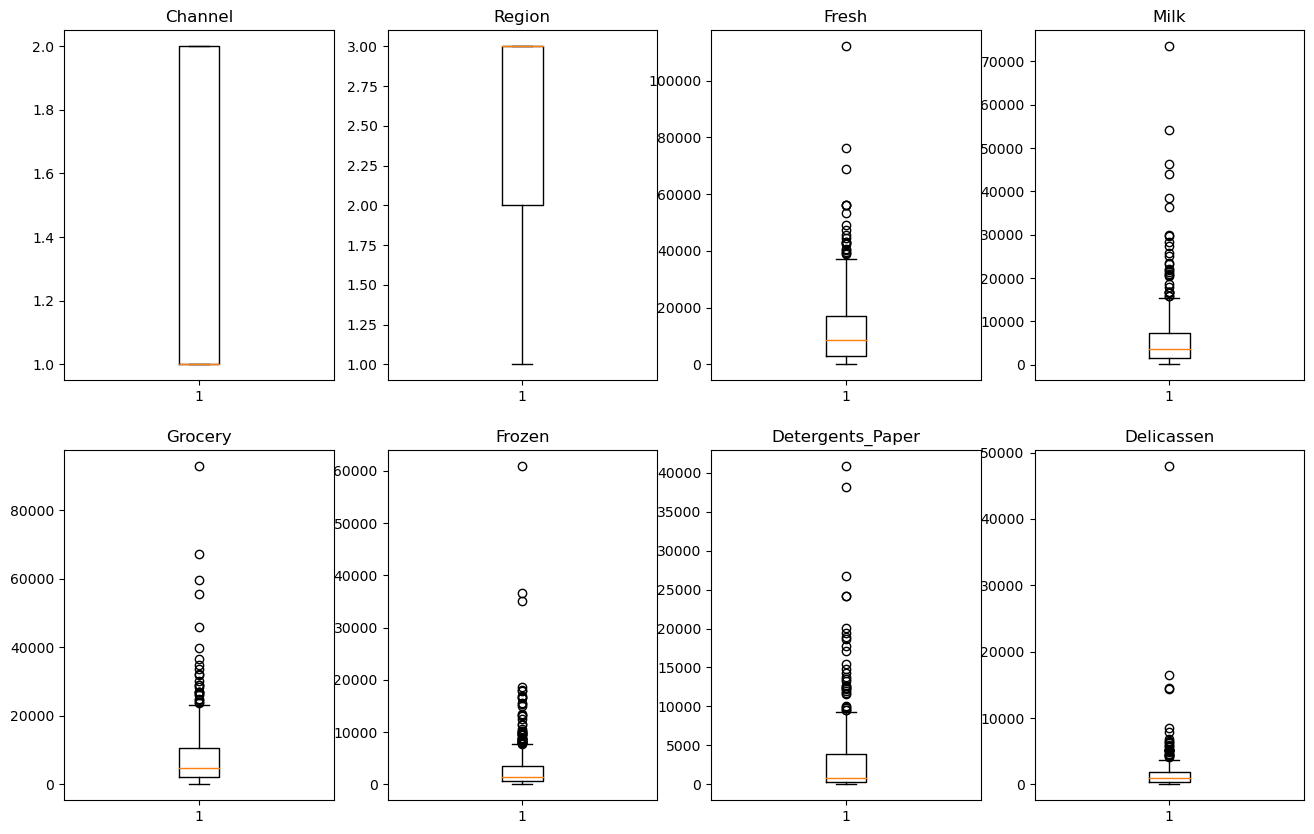

In [10]:
#make box plots
make_boxplot(copy_data, copy_data.columns, 2, 4, (16, 10))
#lots of outliers for item types will have to explore how to handle

In [7]:
# Heat map
def make_heatmap(dataframe):
    correlation = dataframe.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm')

#grocery and detergents_paper appear to have a high correlation as does detergents_paper with milk

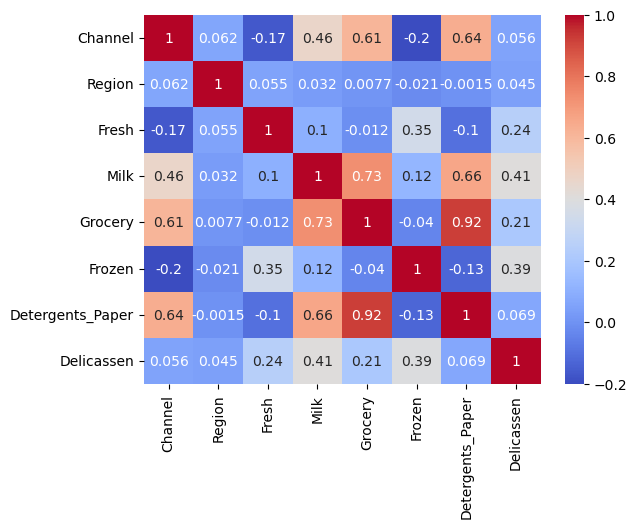

In [16]:
make_heatmap(copy_data)

High correlation between Detergents_paper and Grocery

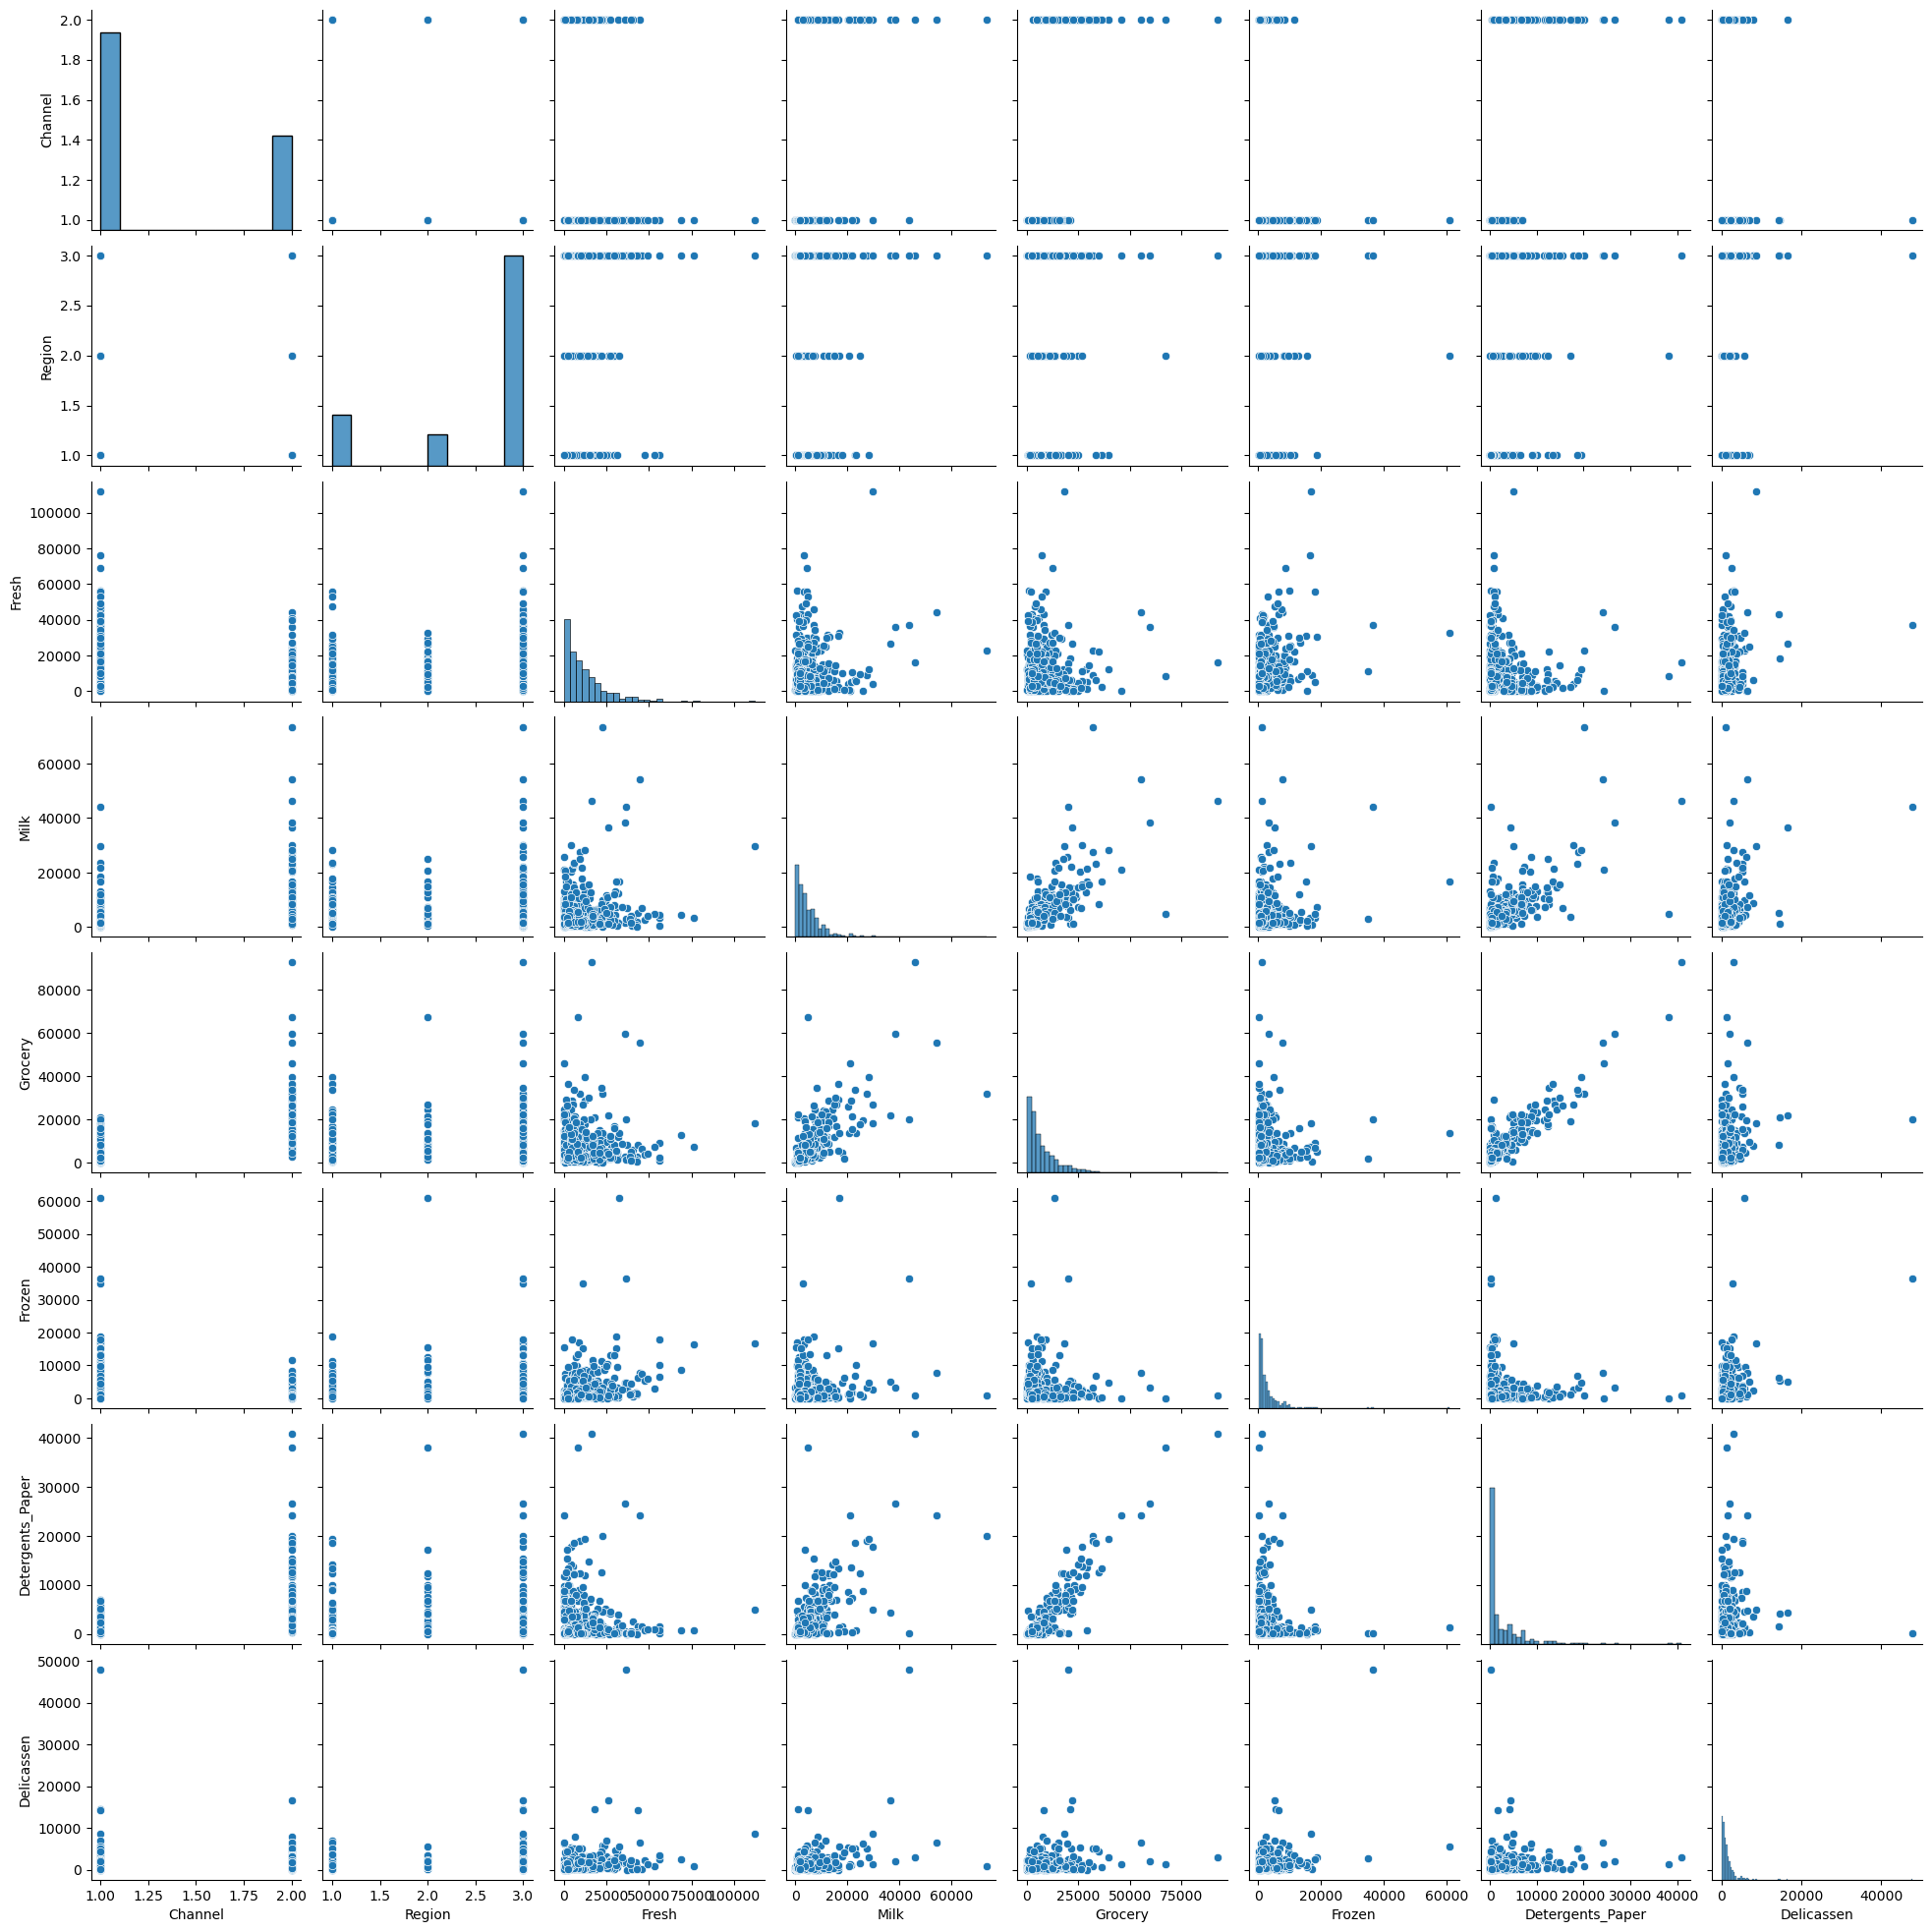

In [19]:
sns.pairplot(copy_data)

In [8]:
#Find outliers and determine frequency and count of outliers
def find_outliers(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1

    my_outliers = (dataframe < (Q1 - 1.5 * IQR)) | (dataframe > (Q3 + 1.5 * IQR))
    return my_outliers


def num_freq_outliers(outliers, dataframe):
    my_outliers_count = outliers.sum()

    outlier_freq = round(my_outliers_count / len(dataframe) * 100, 2)

    print(f"The number of outliers per column are: \n{my_outliers_count}")
    print(f"The number of outliers per column are: \n{outlier_freq}")



In [25]:
#get number and frequency of outliers per column from dataframe
num_freq_outliers(find_outliers(copy_data), copy_data)

The number of outliers per column are: 
Channel              0
Region               0
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
dtype: int64
The number of outliers per column are: 
Channel             0.00
Region              0.00
Fresh               4.55
Milk                6.36
Grocery             5.45
Frozen              9.77
Detergents_Paper    6.82
Delicassen          6.14
dtype: float64


*I have outliers in my data, I am going to explore median imputation, dropping them, and transforming; might model all three*
Also, have imbalanced data for channel and region...

In [32]:
#Replace outliers with medians

#make copy of original
median_df = copy_data.copy()


for col in median_df.columns:
    #find outliers
    my_outliers = find_outliers(copy_data[col])
    #find medians
    median_data = copy_data[col].median()
    #replace outliers with median
    median_df.loc[my_outliers, col] = median_data


df_shape(median_df)



(440, 8)

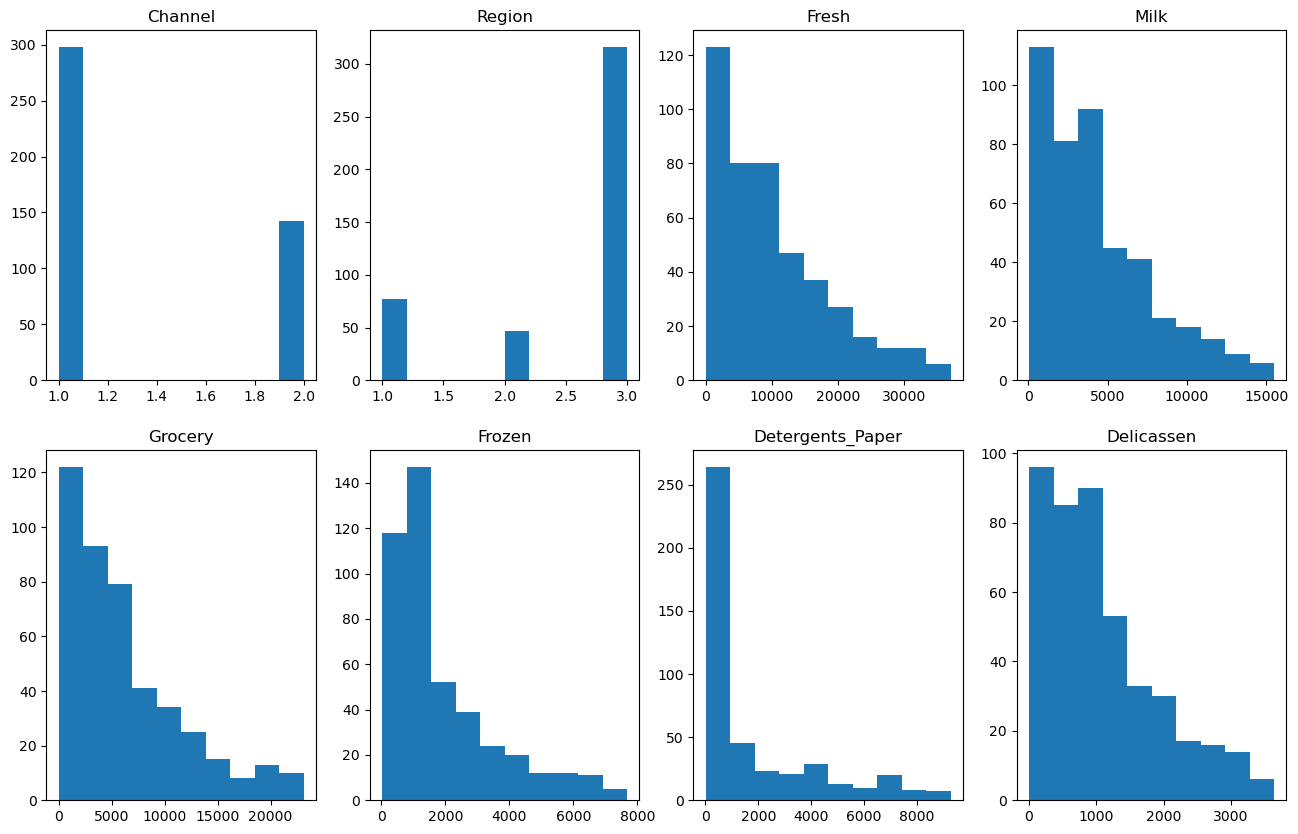

In [33]:
make_hist(median_df, median_df.columns, 2, 4, (16, 10))

replacing outliers with medians changed the distribution as as the count...some counts are only 25% of their original; That is a big jump

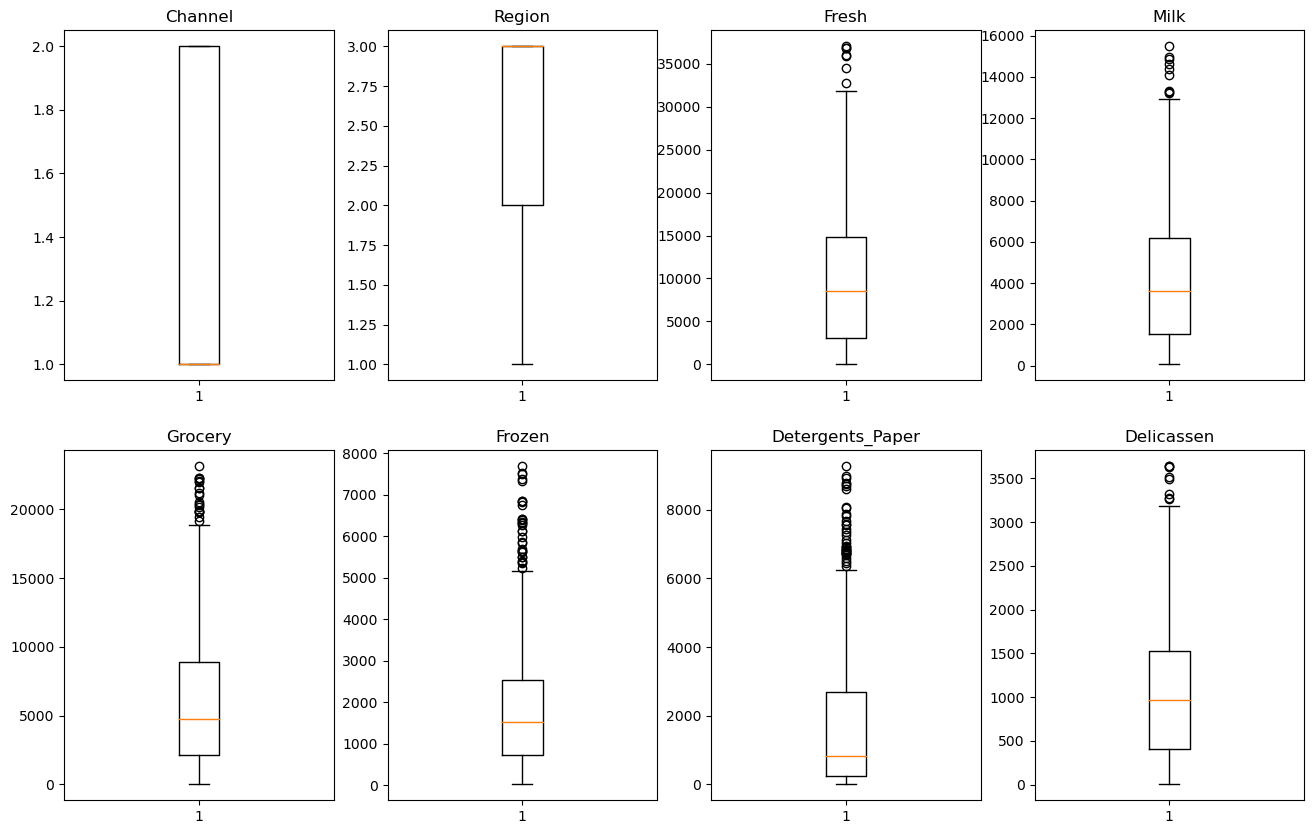

In [34]:
make_boxplot(median_df, median_df.columns, 2, 4, (16, 10))

In [35]:
num_freq_outliers(find_outliers(median_df), median_df)

The number of outliers per column are: 
Channel              0
Region               0
Fresh                7
Milk                 9
Grocery             20
Frozen              31
Detergents_Paper    37
Delicassen           8
dtype: int64
The number of outliers per column are: 
Channel             0.00
Region              0.00
Fresh               1.59
Milk                2.05
Grocery             4.55
Frozen              7.05
Detergents_Paper    8.41
Delicassen          1.82
dtype: float64


I still have outliers with the median imputation as seen with the boxplots and number and frequency of outliers. Odd that the number of outliers increased in some but the frequency decreased

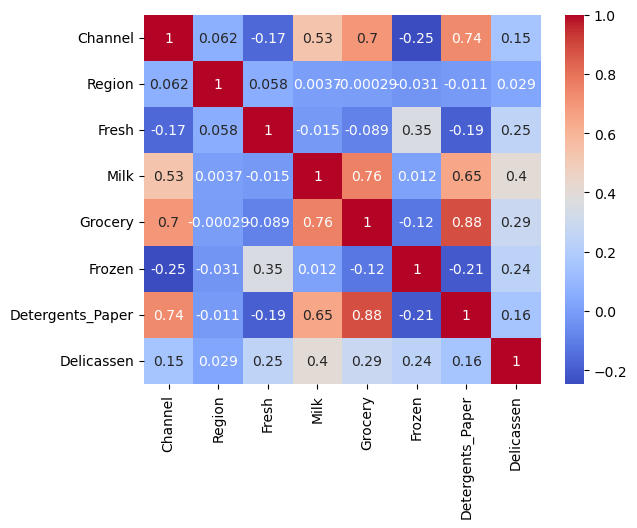

In [17]:
#make heat map of dataframe with imputed median values
make_heatmap(median_df)

some change in correlation, but overall almost no change.

In [5]:

#drop outliers
drop_outliers = copy_data[~my_outliers.any(axis=1)]

#get rows of df with no outliers
num_rows_filtered = df_shape(drop_outliers)[0]

# get rows of orginal df 
original_df_rows = df_shape(copy_data)[0]

percent_loss = abs(round((num_rows_filtered - original_df_rows) / original_df_rows * 100, 2))

print(f"Dropping the outliers will result in a dataframe that is {percent_loss} percent smaller than the original.")



Dropping the outliers will result in a dataframe that is 24.55 percent smaller than the original.


Will not drop outliers due to the percentage of data lost

In [5]:
#log transform to see what happens

#get category columns; may not need to transform channel and region
category_df = copy_data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

#log transform categorical data
cat_log = np.log(category_df)




,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


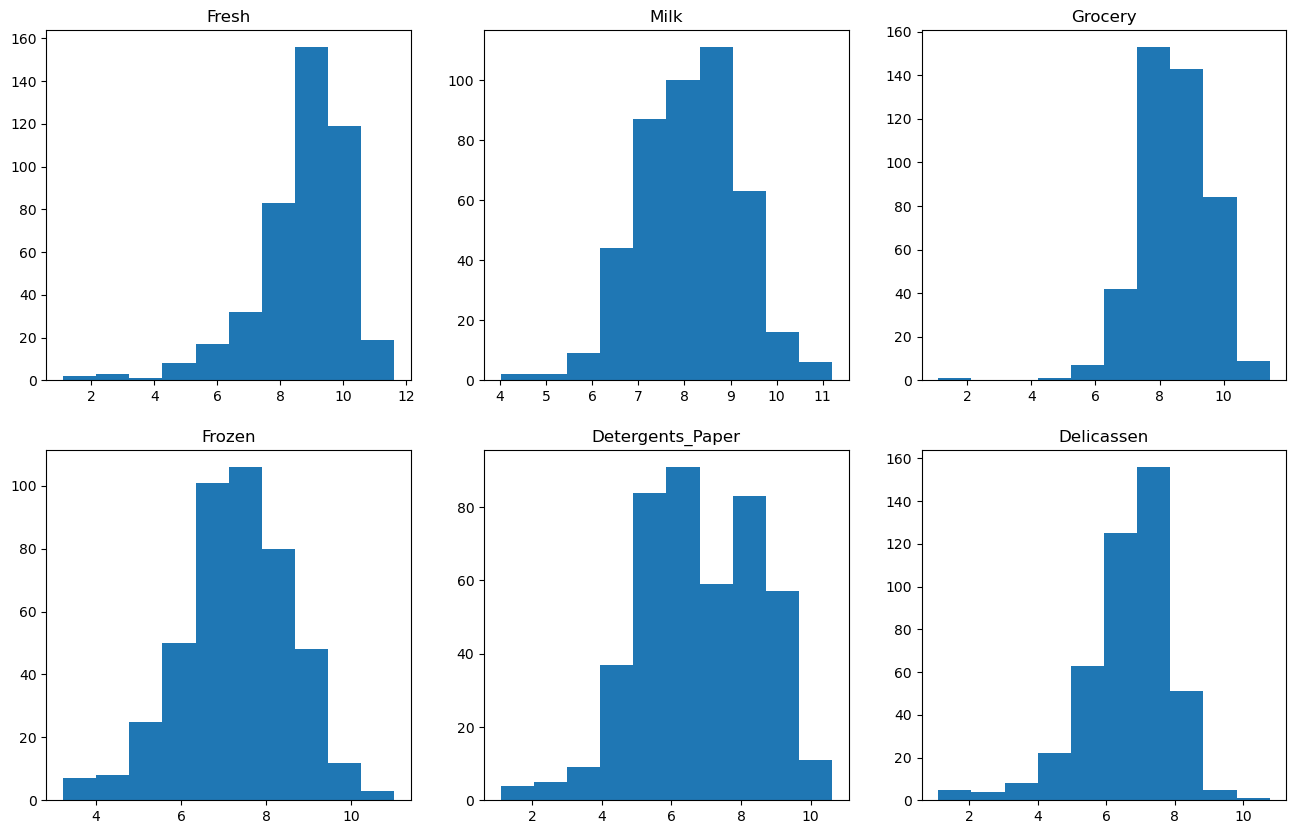

In [9]:
#histograms for log transform data
make_hist(cat_log, cat_log.columns, 2, 3, (16, 10))

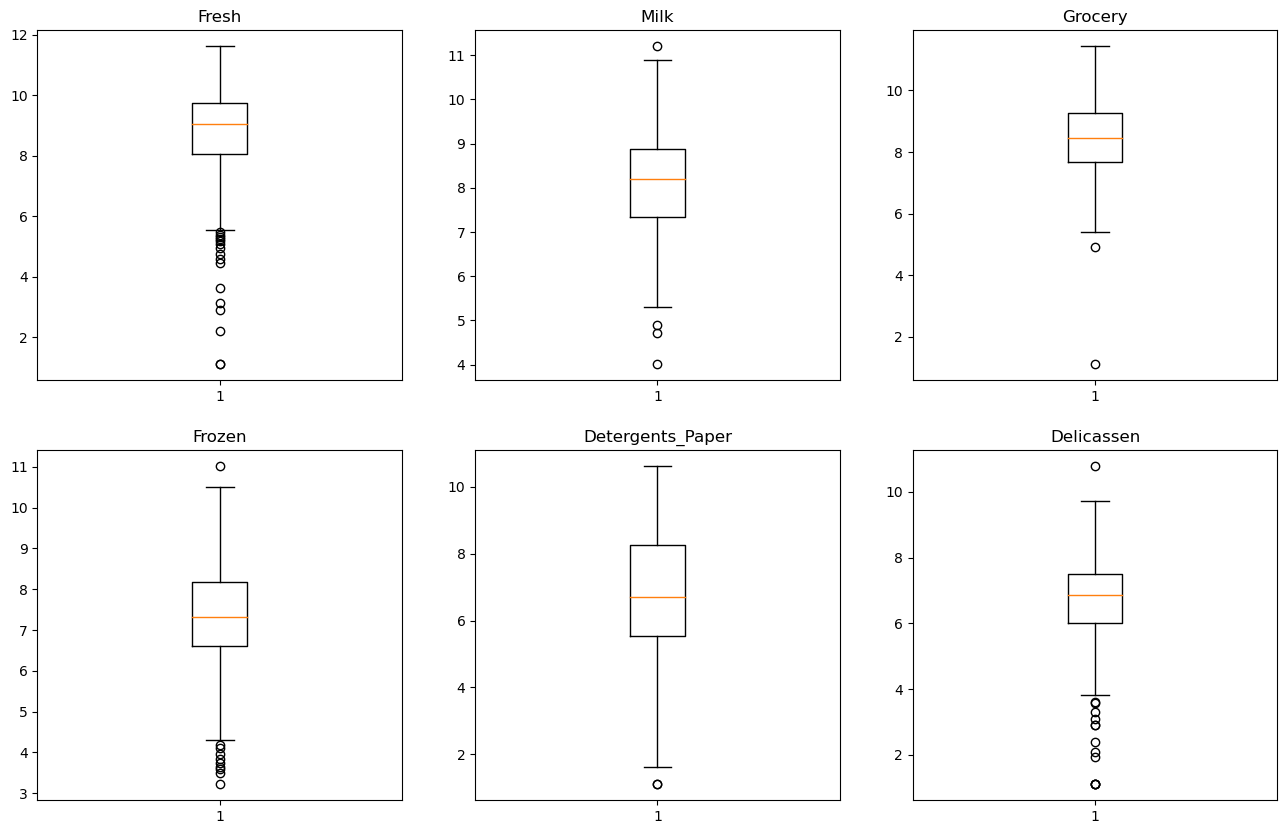

In [10]:
#boxplot for log transforma data
make_boxplot(cat_log, cat_log.columns, 2, 3, (16, 10))

In [14]:
num_freq_outliers(find_outliers(cat_log), cat_log)

The number of outliers per column are: 
Fresh               16
Milk                 4
Grocery              2
Frozen              10
Detergents_Paper     2
Delicassen          14
dtype: int64
The number of outliers per column are: 
Fresh               3.64
Milk                0.91
Grocery             0.45
Frozen              2.27
Detergents_Paper    0.45
Delicassen          3.18
dtype: float64


Outliers moved to the lower end compared to the orginal. Data does look a bit better - way less outliers and normalish distribution

In [9]:
#winorize

#declare new df with relevent columns
winsorized_df = copy_data.copy()

#declare limits
lower_limit = winsorized_df.quantile(0.1)
upper_limit = winsorized_df.quantile(0.90)

#clip df only select columns because Channel and Region were more categorical
winsorized_df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']] = winsorized_df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].clip(lower=lower_limit, upper=upper_limit, axis=1)

In [6]:
winsorized_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669.0,9656.0,7561.0,281.3,2674.0,1338.0
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,2945.9
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,2945.9


In [7]:
df_num_describe(winsorized_df)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,10692.300909,4812.388182,6955.945455,2497.912273,2233.576364,1203.265455
std,0.468052,0.774272,8568.874228,3765.147470,5786.789199,2346.444798,2577.941760,911.251394
min,1.000000,1.000000,915.600000,889.800000,1381.900000,281.300000,99.600000,180.800000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,27090.500000,12229.900000,18910.100000,7545.300000,7438.300000,2945.900000


In [6]:
df_num_describe(copy_data)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


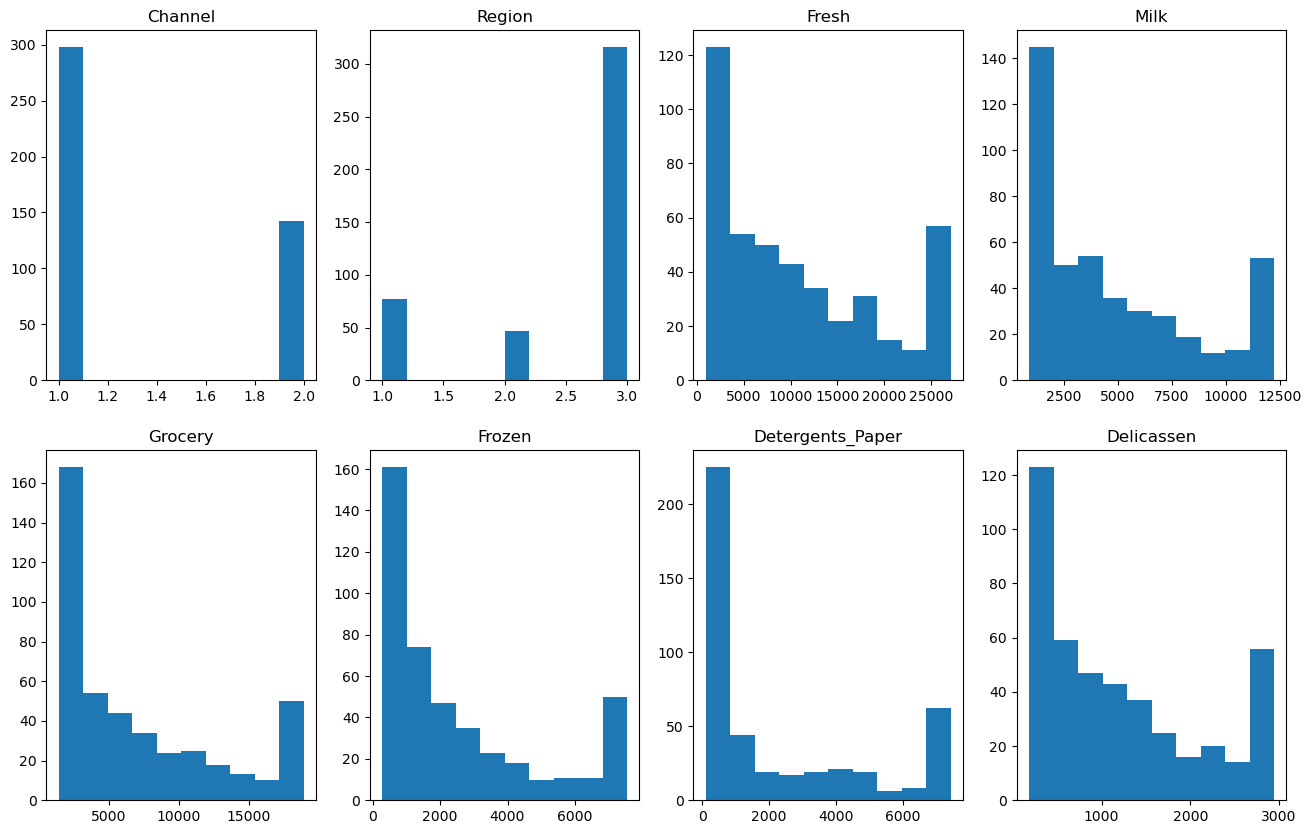

In [11]:
make_hist(winsorized_df, winsorized_df.columns, 2, 4, (16,10))

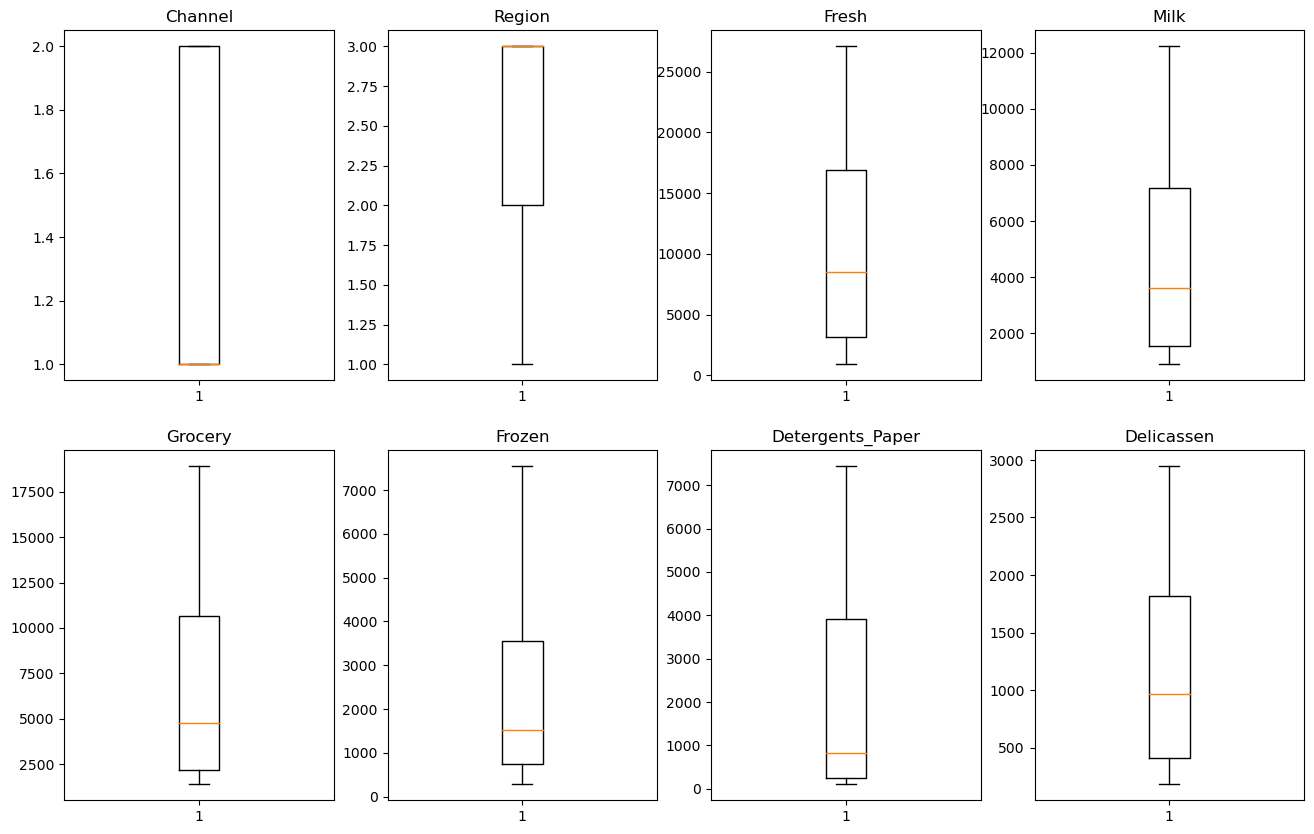

In [12]:
make_boxplot(winsorized_df, winsorized_df.columns, 2, 4, (16,10))

With the winorized approach the data distribution is somewhat similar and it allows a degree of extreme values

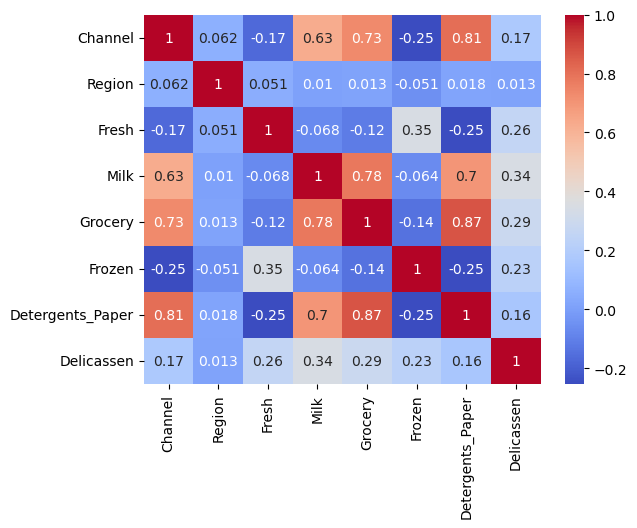

In [13]:
make_heatmap(winsorized_df)

So I will be using the winsorized_df data for modelling as I found it to be the best way to deal with outliers; will haveto remove certain columns that have a correlation greater than or equal to 0.7

# Part II - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

move this part to the end 

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#create list of steps

my_steps = [('scale', StandardScaler()),
            ('pca', PCA(n_components=None, random_state=0))]
#declare pipeline

pca_pipline = Pipeline(my_steps)

#fit data

pca_pipline.fit(winsorized_df)
transform_winsorized = pca_pipline.transform(winsorized_df)



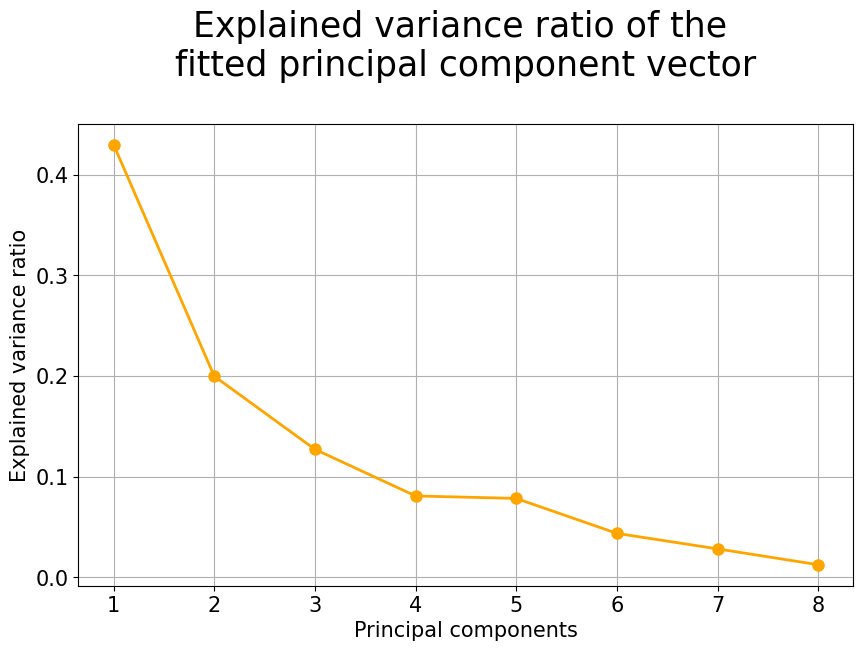

In [9]:
#get explained_variance_ratio
ratio = pca_pipline.named_steps['pca'].explained_variance_ratio_ 

#plot explained variance
plt.figure(figsize=(10,6)) 
plt.plot([i+1 for i in range(len(ratio))], ratio, '-o', color='orange', linewidth=2, markersize=8) 
plt.grid(True) 
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25) 
plt.xlabel("Principal components",fontsize=15) 
plt.xticks([i+1 for i in range(len(ratio))],fontsize=15) 
plt.yticks(fontsize=15) 
plt.ylabel("Explained variance ratio",fontsize=15) 
plt.show()

In [13]:
#compute the sum of the explained variance for 3 components
ratio_sum = ratio[:3].sum() * 100
ratio_sum

75.63789097962115

Three components account for 75.64% of explained variance

In [15]:
#declare new steps with 3 components

new_steps = [('scaler', StandardScaler()), ('pca', PCA(n_components=3, random_state=0))]

#declare pipeline

new_pca_pipline = Pipeline(new_steps)

#fit data
new_pca_pipline.fit(winsorized_df)
X_pca = new_pca_pipline.transform(winsorized_df)



In [17]:
X_pca

array([[ 1.5552632 , -0.16016088, -0.75463452],
       [ 1.93732221,  0.10521049, -0.54937673],
       [ 1.87626694,  0.85556154, -0.50938273],
       ...,
       [ 3.84371116,  0.47670179, -0.6378764 ],
       [-1.20844802,  0.09761362, -0.68920427],
       [-1.351357  , -1.80473435, -0.62319808]])

# Part III - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

DO A KMEANS ON INITIAL DATA THEN GO BACK AND DO PCA, MOVE PCA BACK TO END!!!!

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [1]:
#Determine optimal number of clusters
def plot_distortion(data, max_clusters):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 


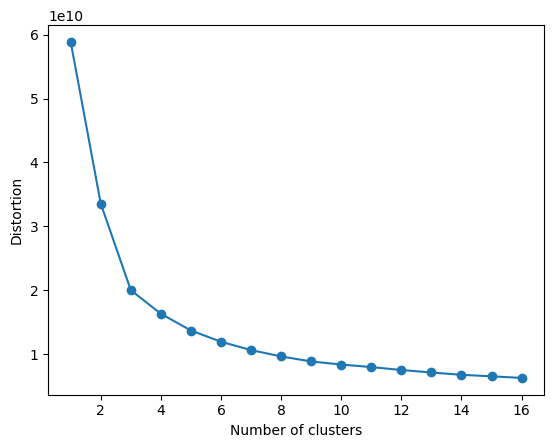

In [12]:
#plot for elbow rule
plot_distortion(winsorized_df, 16)

Three clusters appears to be optimal for our data

In [27]:
#make a pipeline

#declare optimal clusters from above
num_clusters = 3

#declare steps
kmean_steps = [('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=num_clusters, random_state=0))]

#declare pipeline
kmeans_pipeline = Pipeline(kmean_steps)

#fit and transform the data
X_km = kmeans_pipeline.fit_transform(winsorized_df)

#predict data
y_kmeans = kmeans_pipeline.predict(winsorized_df)


/home/sbangarh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
type(X_km)
#type(y_kmeans)

numpy.ndarray

In [21]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

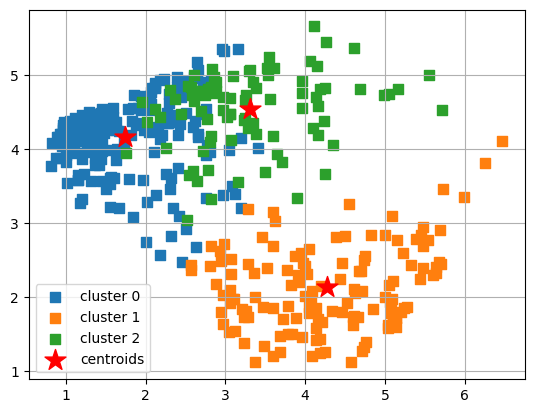

In [29]:
 # plot clustering result
plot_clusters(X_km, y_kmeans, plt_cluster_centers= True)

The clusters could be a lot better; let's revist after doing PCA

In [ ]:
#need to determine optimal number of clusers - elbow method
#apply k means clustering to data
#evaluate the model

# Part IV - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [ ]:
# Findings from EDA - channel region comparison
# PCA findings
# Compare models - might be weird if different metrics